<a href="https://colab.research.google.com/github/luismarti97/miax_lambda/blob/main/Luis_Marti_Avila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Luis Marti Avila.

Phone number: +34 637739103

Email: luismarti92@gmail.com

# **✅Understanding the key characteristics of customers who are likely to churn.**

In [37]:
#Import of the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
#Upload of the csv file.
path= 'churn_all.csv'
df = pd.read_csv(path)
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(df.shape)

(5000, 20)


It is important to check if there is any missing value in the dataset.

In [39]:
df.isna().sum()

,0
state,0
area_code,0
phone_number,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


As we can see, there isn´t any missing value.

In [40]:
df.dtypes

,0
state,object
area_code,int64
phone_number,object
international_plan,object
voice_mail_plan,object
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64
total_eve_minutes,float64


We convert the 'Churn' column to an integer type to ensure it is properly formatted as a binary variable (0 = No Churn, 1 = Churn).

In [41]:
df['Churn'] = df['Churn'].astype(int)
df

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,WV,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,DC,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,DC,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


We can set the phone_number column as the index to uniquely identify each customer. This allows us to track individual customers more effectively and facilitates data manipulation.

In [42]:
df.set_index('phone_number', inplace=True)
df.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
phone_number,,,,,,,,,,,,,,,,,,,
382-4657,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
375-9999,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
330-6626,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [43]:
state_counts = df['state'].value_counts()
state_counts

,count
state,
WV,158
MN,125
AL,124
ID,119
VA,118
OH,116
TX,116
WY,115
NY,114


In [44]:
area_counts = df['area_code'].value_counts()
area_counts

,count
area_code,
415,2495
408,1259
510,1246


We decide to keep the area_code column and remove state because area_code already provides regional information in a more structured way. The state column has many unique values, which could add unnecessary complexity without providing additional predictive power. On the other hand, area_code is more compact and easier to use for analysis.

In [45]:
df = df.drop(columns=['state'])
df

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
phone_number,,,,,,,,,,,,,,,,,,
382-4657,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
375-9999,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
330-6626,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365-8751,408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
334-9736,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
333-6861,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


We clean and convert the international_plan and voice_mail_plan columns from categorical values ('yes'/'no') to binary numerical values (1 for 'yes', 0 for 'no'). This transformation improves data consistency, removes unnecessary whitespace, and makes the data more suitable for machine learning models.

After the conversion, we verify that the transformation was successful by checking the unique values in both columns.

In [46]:
df['international_plan'] = df['international_plan'].str.strip().map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].str.strip().map({'yes': 1, 'no': 0})
df

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
phone_number,,,,,,,,,,,,,,,,,,
382-4657,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
375-9999,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
330-6626,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365-8751,408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
334-9736,415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
333-6861,415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [47]:
df.dtypes

,0
area_code,int64
international_plan,int64
voice_mail_plan,int64
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64
total_eve_minutes,float64
total_eve_calls,int64
total_eve_charge,float64


Before training our machine learning model, we need to check if the dataset is imbalanced. A class imbalance occurs when one class (e.g., Churn=0 or Churn=1) has significantly more samples than the other.

To visualize this, we create a pie chart showing the percentage of customers who churn (1) versus those who do not churn (0). If there is a strong imbalance, we may need to apply techniques such as undersampling, oversampling, or class weighting to improve model performance.

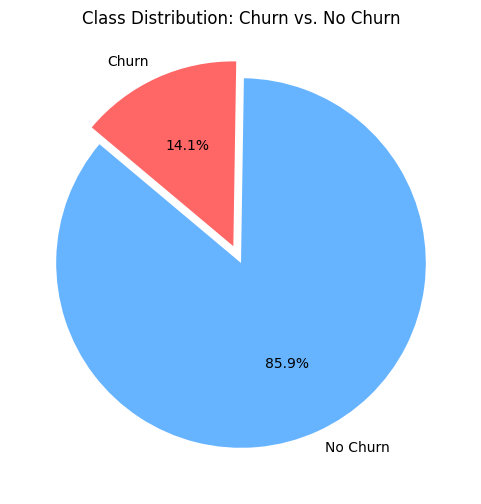

In [48]:
churn_counts = df['Churn'].value_counts()
labels = ['No Churn', 'Churn']
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1])
plt.title("Class Distribution: Churn vs. No Churn")
plt.show()

As we can see, just the 14.1% of the clients has the Churn tag.

We generate a correlation matrix to analyze the relationships between different features in the dataset. The correlation values range from -1 to 1:

  Values close to 1 indicate a strong positive correlation (both variables
  increase together).

  Values close to -1 indicate a strong negative correlation (one variable increases while the other decreases).

  Values close to 0 suggest no strong relationship between the variables.
  
The heatmap helps us identify highly correlated features, which could be redundant, and understand which variables are most related to churn.

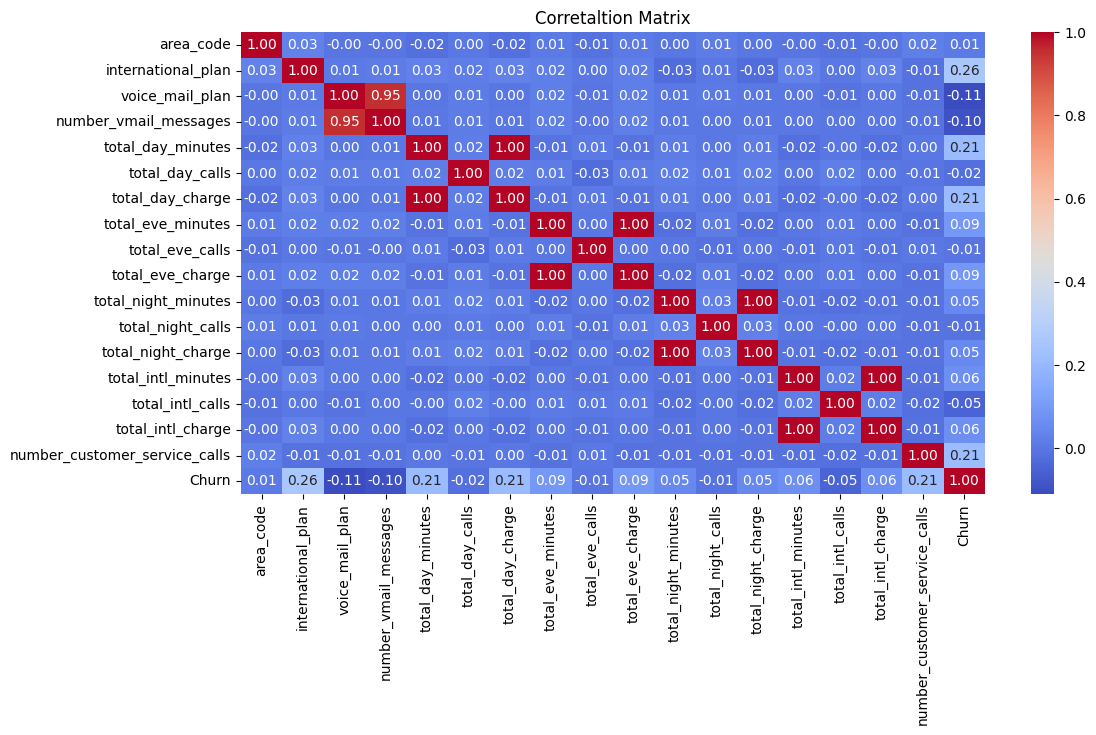

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corretaltion Matrix')
plt.show()

**Key Observations from the Correlation Matrix.**

1) High correlation between total_day_minutes and total_day_charge (1.00), and similar patterns for evening, night, and international charges. Conclusion: Since charges are directly derived from usage (minutes), we can remove one of them to avoid redundancy.

2) number_customer_service_calls shows a moderate correlation with churn (0.21).Conclusion: Customers who call customer service more frequently are more likely to churn. This variable is important for prediction.

3)international_plan has the highest correlation with churn (0.26).
Conclusion: Customers with an international plan are more likely to leave, possibly due to higher costs or dissatisfaction with the service.

The following code generates three histograms to analyze the distribution of key features in relation to customer churn. These features were identified as important predictors based on the correlation matrix.

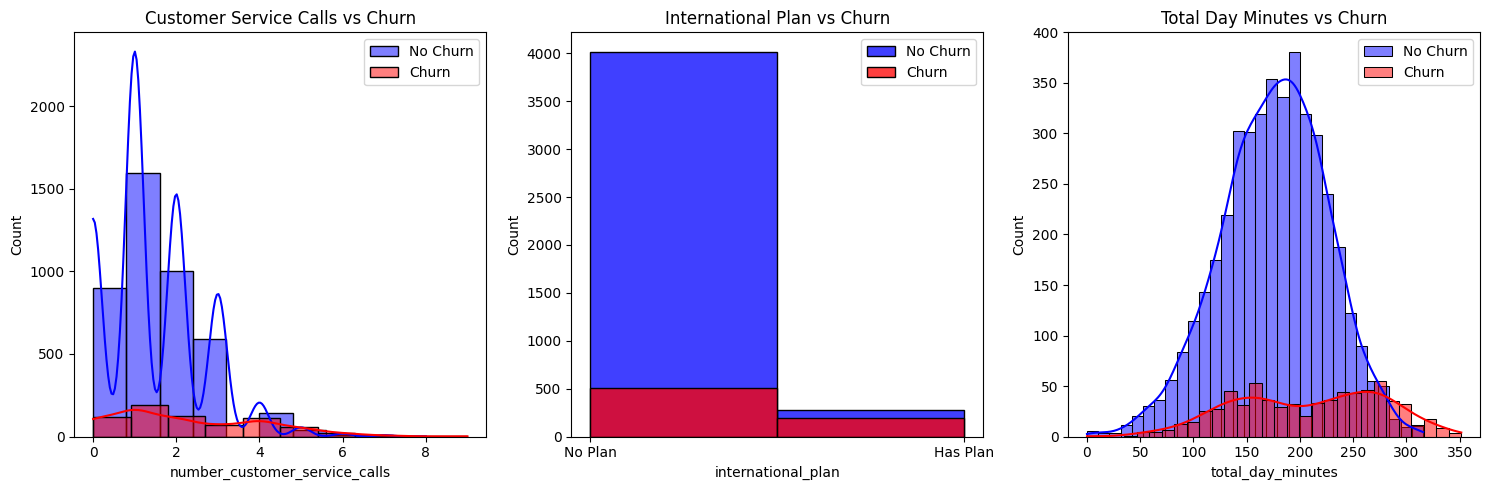

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df[df['Churn'] == 0]['number_customer_service_calls'], bins=10, kde=True, color='blue', ax=axes[0], label='No Churn')
sns.histplot(df[df['Churn'] == 1]['number_customer_service_calls'], bins=10, kde=True, color='red', ax=axes[0], label='Churn')
axes[0].set_title('Customer Service Calls vs Churn')
axes[0].legend()

sns.histplot(df[df['Churn'] == 0]['international_plan'], bins=2, kde=False, color='blue', ax=axes[1], label='No Churn')
sns.histplot(df[df['Churn'] == 1]['international_plan'], bins=2, kde=False, color='red', ax=axes[1], label='Churn')
axes[1].set_title('International Plan vs Churn')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No Plan', 'Has Plan'])
axes[1].legend()

sns.histplot(df[df['Churn'] == 0]['total_day_minutes'], bins=30, kde=True, color='blue', ax=axes[2], label='No Churn')
sns.histplot(df[df['Churn'] == 1]['total_day_minutes'], bins=30, kde=True, color='red', ax=axes[2], label='Churn')
axes[2].set_title('Total Day Minutes vs Churn')
axes[2].legend()

plt.tight_layout()
plt.show()

**Key Observations: **

1) Customer Service Calls vs. Churn:

Customers with few customer service calls (0-2) have a lower churn rate (blue dominates).
Customers with 4 or more service calls show a significantly higher churn rate (more red bars).
Conclusion: This confirms that frequent customer service calls indicate dissatisfaction and increase churn probability.

2) International Plan vs. Churn

The majority of customers do not have an international plan (most blue bars).
Among those who do have an international plan, the churn rate is higher (more red proportionally).
Conclusion: Customers with an international plan are more likely to churn, possibly due to higher costs or dissatisfaction with international services.

3)Total Day Minutes vs. Churn

The distribution is right-skewed, meaning most customers make fewer calls during the day.
Customers with higher daytime call usage (above ~200 minutes) have a higher probability of churning.
Conclusion: Higher call usage is associated with churn, possibly due to higher costs or frustration with the service.


**FEATURE IMPORTANCE**

Feature importance helps us identify the most relevant variables in predicting churn. We use a Random Forest Classifier, which provides a measure of how much each feature contributes to the model's predictions.

The importance values reflect how much the model relies on each feature when making a decision. Features with higher values have a greater impact on predicting churn.

In [51]:
# Separate predictor variables (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [52]:
# Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardization ensures that all features have the same scale, which helps models perform better.

In [53]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

This splits the data into:

Training set (80%) → Used to train the model.

Testing set (20%) → Used to evaluate model performance.

In [55]:
# Train a Random Forest Classifier with balanced classes
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
# Extract feature importance scores
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
# Display the feature importance values
print("\nFeature Importance according to Random Forest (with balanced classes):")
print(importances)


Feature Importance according to Random Forest (with balanced classes):
                          Feature  Importance
16  number_customer_service_calls    0.156252
6                total_day_charge    0.145046
4               total_day_minutes    0.126976
1              international_plan    0.095708
7               total_eve_minutes    0.063077
9                total_eve_charge    0.059622
10            total_night_minutes    0.042557
12             total_night_charge    0.040386
13             total_intl_minutes    0.040334
15              total_intl_charge    0.040231
14               total_intl_calls    0.039826
8                 total_eve_calls    0.034013
11              total_night_calls    0.032839
5                 total_day_calls    0.032244
3           number_vmail_messages    0.025899
2                 voice_mail_plan    0.016719
0                       area_code    0.008273


<ipython-input-56-f600d4ce1167>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances['Importance'], y=importances['Feature'], palette='coolwarm')


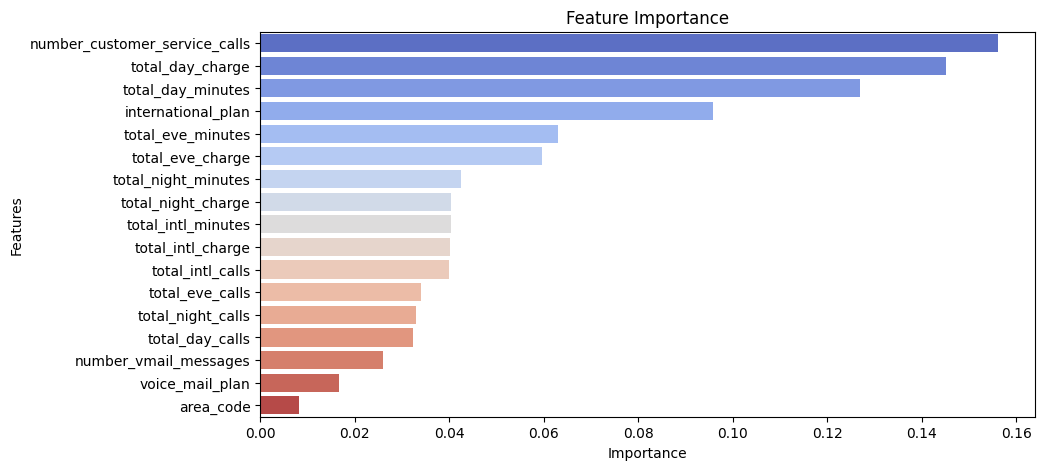

In [56]:
# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=importances['Importance'], y=importances['Feature'], palette='coolwarm')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

We decide to remove the following features because they have low importance in predicting customer churn, as shown in the feature importance plot:

1️)total_intl_calls, total_eve_calls, total_night_calls, total_day_calls

These features provide little predictive power compared to total minutes for each time period.
Since total_minutes features (e.g., total_day_minutes) are already included, keeping these call count features would be redundant.

2️)number_vmail_messages, voice_mail_plan

These features have minimal impact on churn prediction.
The presence of a voicemail plan (voice_mail_plan) and the number of voicemail messages do not significantly influence customer behavior.

3️)area_code

The model finds no strong relationship between area_code and churn.
This feature does not provide meaningful differentiation among customers.
By removing these low-importance variables, we simplify the model, reduce computational cost, and improve generalization.

# **Conclusion: Understanding Key Characteristics of Customers Likely to Churn.**

After conducting an in-depth analysis of customer data, we have identified the key factors that contribute to customer churn.

**Key Insights:**

1) Frequent Customer Service Calls Indicate Dissatisfaction

Customers who contact customer service multiple times are significantly more likely to churn.
This suggests that frustration with the service or unresolved issues are major drivers of customer loss.

2) International Plan Customers Have a Higher Churn Rate

Customers subscribed to an international plan are more prone to churn, possibly due to higher costs or dissatisfaction with international services.
Special retention strategies should be considered for this segment.

3) Heavy Callers Are at Higher Risk of Churn

Customers with high daily usage (total_day_minutes) are more likely to churn.
This could be linked to high bills or unmet expectations regarding service quality and pricing.

4) Removing Less Relevant Features Improves Model Performance

Features like area_code, total_calls, and voicemail-related features do not significantly impact churn prediction and have been removed.
By focusing only on the most relevant variables, we improve model efficiency and accuracy.

# **✅Predicting the customer’s likelihood of leaving (churning).**

In our dataset, the number of customers who do not churn (Churn = 0) is significantly higher than those who do churn (Churn = 1). This imbalance can negatively affect our machine learning models by making them biased towards the majority class.

To address this issue, we apply undersampling, where we randomly select a balanced subset of non-churning customers to match the number of churning customers. This ensures that our model learns equally from both groups.

In [64]:
df_churn = df_selected[df_selected['Churn'] == 1]  # All customers who churn
df_no_churn = df_selected[df_selected['Churn'] == 0].sample(n=len(df_churn), random_state=42)

df_balanced = pd.concat([df_churn, df_no_churn])
df_balanced = df_balanced.sample(frac=1, random_state=42)

print(df_balanced['Churn'].value_counts())
df_balanced.head()

Churn
0    707
1    707
Name: count, dtype: int64


,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_charge,international_plan,Churn
phone_number,,,,,,,,
373-2782,1,224.4,159.5,192.8,13.0,3.51,0,0
401-1454,1,162.1,212.1,260.4,12.2,3.29,0,0
353-9998,4,109.0,259.3,182.1,13.3,3.59,0,1
377-1273,1,261.4,215.7,271.8,8.0,2.16,0,1
417-4810,1,236.4,287.3,192.0,13.8,3.73,0,1


# **Random Forest Classifier**

This Random Forest Classifier is designed to predict customer churn using the most relevant features we identified earlier. It is trained on a balanced dataset, preventing bias toward the majority class (Churn = 0).

We also include data preprocessing, model training, evaluation metrics, and visualization techniques to assess model performance.


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       145
           1       0.85      0.88      0.86       138

    accuracy                           0.87       283
   macro avg       0.87      0.87      0.87       283
weighted avg       0.87      0.87      0.87       283



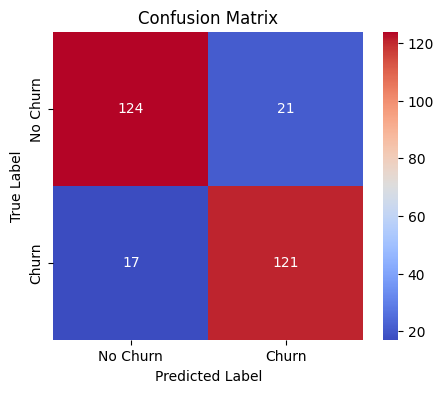

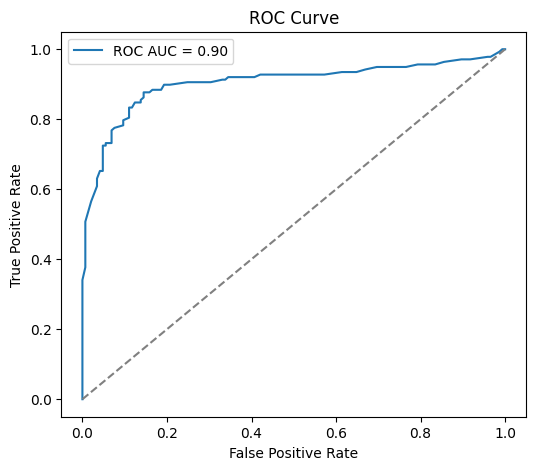

In [65]:
X = df_balanced.drop(columns=['Churn'])
y = df_balanced['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Overall, the model performs well, with strong classification metrics.

The false negative rate (missed churners) should be minimized further, possibly by tuning hyperparameters or testing alternative models.

The high AUC score (0.90) indicates that the model effectively differentiates between churners and non-churners

To improve our model and reduce false negatives, we will fine-tune the hyperparameters of our Random Forest Classifier using GridSearchCV. This allows us to test different parameter combinations and find the optimal configuration.

# **NEURAL NETWORK.**

While Random Forest provided strong results, we now explore a Neural Network approach to improve our churn prediction performance.

A Neural Network (also called a Multi-Layer Perceptron, MLP) is useful because:

1) Detects complex, non-linear patterns that traditional models like Random Forest might miss.

2) Learns feature interactions automatically without requiring manual engineering.

3) Can generalize better when trained with dropout and regularization.

Why Use This Improved Neural Network?
Multiple hidden layers → Allows the network to learn deeper representations.

LeakyReLU activation → Avoids the vanishing gradient problem, improving training.

Dropout layers → Reduces overfitting by randomly disabling neurons during training.

Adam optimizer with a lower learning rate → Ensures stable and precise weight updates.

Early Stopping → Stops training automatically when validation loss stops improving, preventing overfitting.

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5152 - loss: 0.7000 - val_accuracy: 0.6431 - val_loss: 0.6641
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5893 - loss: 0.6798 - val_accuracy: 0.7244 - val_loss: 0.6311
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6735 - loss: 0.6362 - val_accuracy: 0.7739 - val_loss: 0.5919
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6988 - loss: 0.6026 - val_accuracy: 0.7880 - val_loss: 0.5468
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7643 - loss: 0.5530 - val_accuracy: 0.8127 - val_loss: 0.5109
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7578 - loss: 0.5520 - val_accuracy: 0.8163 - val_loss: 0.4898
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7536 - loss: 0.5387 - val_accuracy: 0.8269 - val_loss: 0.4710
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7409 - loss: 0.5735 - val_accuracy: 0.8304 - val_loss: 0.

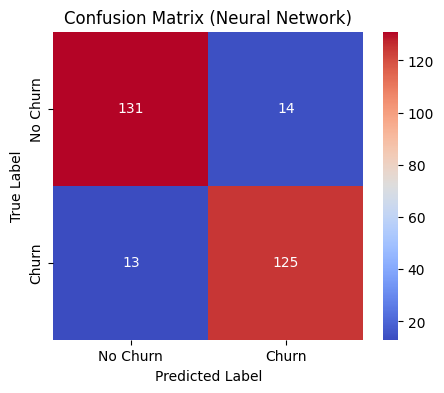

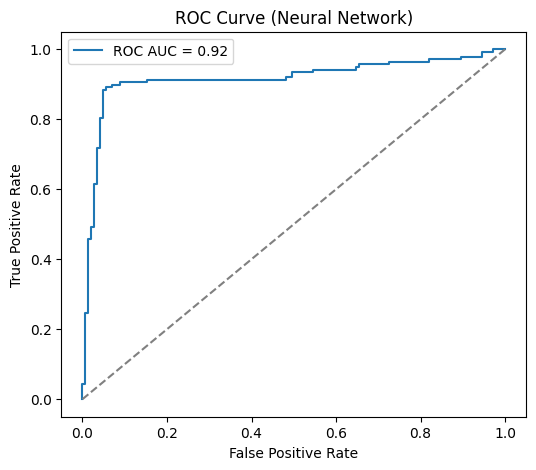

In [67]:
X = df_balanced.drop(columns=['Churn'])
y = df_balanced['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(16),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    Dense(8),
    LeakyReLU(alpha=0.01),

    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=16, verbose=1, callbacks=[early_stopping])

y_pred_proba = model.predict(X_test).ravel()  # Get probability scores
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Neural Network)")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Baseline classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Neural Network)")
plt.legend()
plt.show()

Only 13 false negatives, meaning the model misses fewer churners compared to KNN.

False positives (14) are slightly lower than KNN, which means fewer incorrect churn predictions.

Overall, the model has a strong balance between detecting churn and minimizing errors.

RESULTS.

Neural Network is slightly better in terms of AUC (0.92 vs. 0.90) → It is better at separating churners from non-churners.

KNN had better recall for No Churn customers (0.92 vs. 0.90) → KNN might be better at avoiding unnecessary churn interventions.

Neural Network performs better in identifying churners (higher recall at 0.91) → Better at reducing false negatives, which is critical in churn prevention.

False positives are lower in Neural Network (14 vs. 15 in KNN) → Fewer incorrect churn predictions mean less unnecessary customer contact.

Now we will generate churn probability scores using our trained Neural Network model.

In [72]:
X_new = df_selected.drop(columns=['Churn'])

X_new_scaled = scaler.transform(X_new)

df_selected['Churn_Probability'] = model.predict(X_new_scaled).ravel()
df_ranked = df_selected[['Churn_Probability']].sort_values(by='Churn_Probability', ascending=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-72-3227c75e342b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Churn_Probability'] = model.predict(X_new_scaled).ravel()


In [73]:
df_ranked

,Churn_Probability
phone_number,
341-7686,0.998213
338-6962,0.996895
372-3750,0.995847
388-6108,0.995463
388-6925,0.995179
...,...
357-7060,0.017763
383-6373,0.015807
336-1043,0.013416


In [74]:
df_selected = df_selected.merge(df_ranked, left_index=True, right_index=True)
df_selected

,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_charge,international_plan,Churn,Churn_Probability_x,Churn_Probability_y
phone_number,,,,,,,,,,
382-4657,1,265.1,197.4,244.7,10.0,2.70,0,0,0.911083,0.911083
371-7191,1,161.6,195.5,254.4,13.7,3.70,0,0,0.121502,0.121502
358-1921,0,243.4,121.2,162.6,12.2,3.29,0,0,0.157034,0.157034
375-9999,2,299.4,61.9,196.9,6.6,1.78,1,0,0.672134,0.672134
330-6626,3,166.7,148.3,186.9,10.1,2.73,1,0,0.765481,0.765481
...,...,...,...,...,...,...,...,...,...,...
365-8751,2,235.7,223.0,297.5,9.9,2.67,0,0,0.790266,0.790266
334-9736,3,184.2,256.8,213.6,14.7,3.97,0,1,0.201835,0.201835
333-6861,1,140.6,172.8,212.4,13.6,3.67,0,0,0.108015,0.108015


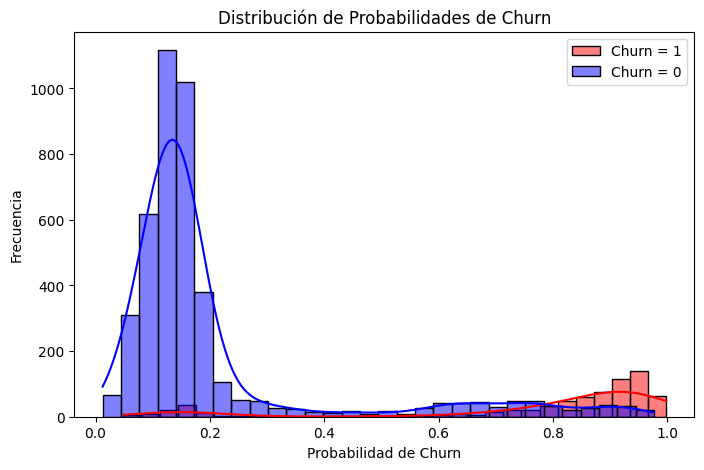

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df_selected[df_selected['Churn'] == 1]['Churn_Probability_x'], bins=30, color='red', label='Churn = 1', kde=True)
sns.histplot(df_selected[df_selected['Churn'] == 0]['Churn_Probability_x'], bins=30, color='blue', label='Churn = 0', kde=True)
plt.legend()
plt.title("Distribución de Probabilidades de Churn")
plt.xlabel("Probabilidad de Churn")
plt.ylabel("Frecuencia")
plt.show()

In [79]:
threshold = 0.5

df_selected['Predicted_Churn'] = (df_selected['Churn_Probability_x'] > threshold).astype(int)
correct_churn_predictions = df_selected[(df_selected['Churn'] == 1) & (df_selected['Predicted_Churn'] == 1)].shape[0]
total_churners = df_selected[df_selected['Churn'] == 1].shape[0]

false_negatives = df_selected[(df_selected['Churn'] == 1) & (df_selected['Predicted_Churn'] == 0)].shape[0]

print(f"Total de clientes que hicieron churn: {total_churners}")
print(f"Clientes correctamente identificados como churn: {correct_churn_predictions} ({(correct_churn_predictions/total_churners)*100:.2f}%)")
print(f"Clientes que hicieron churn pero el modelo falló (falsos negativos): {false_negatives} ({(false_negatives/total_churners)*100:.2f}%)")

import pandas as pd
results_df = pd.DataFrame({
    "Metric": ["Total Churners", "Correctly Identified Churners", "False Negatives"],
    "Count": [total_churners, correct_churn_predictions, false_negatives]
})

Total de clientes que hicieron churn: 707
Clientes correctamente identificados como churn: 614 (86.85%)
Clientes que hicieron churn pero el modelo falló (falsos negativos): 93 (13.15%)


In [80]:
df_selected = df_selected.drop(columns=['Churn_Probability_y']).rename(columns={'Churn_Probability_x': 'Churn_Probability'})
df_selected

,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_charge,international_plan,Churn,Churn_Probability,Predicted_Churn
phone_number,,,,,,,,,,
382-4657,1,265.1,197.4,244.7,10.0,2.70,0,0,0.911083,1
371-7191,1,161.6,195.5,254.4,13.7,3.70,0,0,0.121502,0
358-1921,0,243.4,121.2,162.6,12.2,3.29,0,0,0.157034,0
375-9999,2,299.4,61.9,196.9,6.6,1.78,1,0,0.672134,1
330-6626,3,166.7,148.3,186.9,10.1,2.73,1,0,0.765481,1
...,...,...,...,...,...,...,...,...,...,...
365-8751,2,235.7,223.0,297.5,9.9,2.67,0,0,0.790266,1
334-9736,3,184.2,256.8,213.6,14.7,3.97,0,1,0.201835,0
333-6861,1,140.6,172.8,212.4,13.6,3.67,0,0,0.108015,0


# ✅**Identifying the top 500 customers to contact first – maximizing profitability and minimizing churn.**

In order to maximize revenue retention and reduce customer churn, we must prioritize the most valuable customers at risk of leaving. Simply selecting customers with the highest churn probability is not enough—we need to combine churn risk with customer profitability to optimize our strategy.

In [81]:
columns_to_add = ['total_day_charge', 'total_eve_charge', 'total_night_charge']

df_extra = df[columns_to_add]
df_selected = df_selected.merge(df_extra, left_index=True, right_index=True, how='left')
df_selected

,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_charge,international_plan,Churn,Churn_Probability,Predicted_Churn,total_day_charge,total_eve_charge,total_night_charge
phone_number,,,,,,,,,,,,,
382-4657,1,265.1,197.4,244.7,10.0,2.70,0,0,0.911083,1,45.07,16.78,11.01
371-7191,1,161.6,195.5,254.4,13.7,3.70,0,0,0.121502,0,27.47,16.62,11.45
358-1921,0,243.4,121.2,162.6,12.2,3.29,0,0,0.157034,0,41.38,10.30,7.32
375-9999,2,299.4,61.9,196.9,6.6,1.78,1,0,0.672134,1,50.90,5.26,8.86
330-6626,3,166.7,148.3,186.9,10.1,2.73,1,0,0.765481,1,28.34,12.61,8.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365-8751,2,235.7,223.0,297.5,9.9,2.67,0,0,0.790266,1,40.07,18.96,13.39
334-9736,3,184.2,256.8,213.6,14.7,3.97,0,1,0.201835,0,31.31,21.83,9.61
333-6861,1,140.6,172.8,212.4,13.6,3.67,0,0,0.108015,0,23.90,14.69,9.56


Calculate a Profitability-Weighted Churn Score

Instead of just using churn probability, we create a profitability-adjusted metric that considers both churn risk and total revenue contribution.

Prioritize Customers with the Highest Churn Probability AND the Highest Total Charges

Customers who contribute higher total charges (day, evening, night, and international charges) are prioritized to prevent significant revenue loss.
elect the Top 500 Most Critical Customers

We rank customers based on both churn risk and profitability, ensuring that the most valuable at-risk customers receive immediate attention.

In [82]:
df_selected['Total_Charges'] = df_selected[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)
df_selected['Profitability_Churn_Score'] = df_selected['Churn_Probability'] * df_selected['Total_Charges']
df_top_500 = df_selected.sort_values(by=['Profitability_Churn_Score'], ascending=False).head(500)
df_top_500

,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_charge,international_plan,Churn,Churn_Probability,Predicted_Churn,total_day_charge,total_eve_charge,total_night_charge,Total_Charges,Profitability_Churn_Score
phone_number,,,,,,,,,,,,,,,
345-9140,1,346.8,249.5,275.4,13.3,3.59,1,1,0.984152,1,58.96,21.21,12.39,96.15,94.626188
406-2551,1,351.5,206.8,275.8,11.9,3.21,0,1,0.985104,1,59.76,17.58,12.41,92.96,91.575298
343-5709,1,350.8,216.5,253.9,10.1,2.73,0,1,0.988699,1,59.64,18.40,11.43,92.20,91.158083
351-7269,4,332.9,317.8,160.6,5.4,1.46,0,1,0.986978,1,56.59,27.01,7.23,92.29,91.088221
331-5650,1,325.5,300.3,199.8,5.7,1.54,0,1,0.991133,1,55.34,25.53,8.99,91.40,90.589592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363-5220,4,274.0,162.8,110.0,7.7,2.08,1,0,0.779228,1,46.58,13.84,4.95,67.45,52.558911
360-8131,1,189.6,171.7,222.0,13.9,3.75,1,1,0.867877,1,32.23,14.59,9.99,60.56,52.558657
389-2130,5,137.9,234.9,166.6,14.3,3.86,0,1,0.957305,1,23.44,19.97,7.50,54.77,52.431570


# ✅**Evaluating how your strategy compares to randomly contacting the business’ customers.**

In [83]:
import numpy as np

churn_in_top_500 = df_top_500['Churn'].sum()

random_sample = df_selected.sample(n=500, random_state=42)
churn_in_random_500 = random_sample['Churn'].sum()

percent_churn_top_500 = (churn_in_top_500 / 500) * 100
percent_churn_random_500 = (churn_in_random_500 / 500) * 100

comparison_df = pd.DataFrame({
    "Strategy": ["Optimized Selection", "Random Selection"],
    "Churned Customers": [churn_in_top_500, churn_in_random_500],
    "Churn Rate (%)": [percent_churn_top_500, percent_churn_random_500]
})

comparison_df

,Strategy,Churned Customers,Churn Rate (%)
0,Optimized Selection,351,70.2
1,Random Selection,62,12.4


The results clearly demonstrate that our optimized customer selection strategy significantly outperforms a random selection approach when it comes to identifying customers at risk of churn.

# **Final Business Insights: Answering the Key Questions**

After conducting an extensive analysis on customer churn, we can now provide a structured response to the four key business questions. This analysis is based on data-driven insights and predictive modeling, allowing for a more effective customer retention strategy.

**Understanding the Key Characteristics of Customers Who Are Likely to Churn**

Our analysis has identified specific behavioral patterns and customer attributes that are strongly associated with a higher likelihood of churn. The most important characteristics include:

-Frequent customer service calls: Customers who contact customer support
multiple times are more likely to churn. This suggests that dissatisfaction with the service or unresolved issues may be key drivers of customer attrition.

-Enrollment in an international plan: Customers with an international plan exhibit a higher likelihood of churn. This may be due to higher costs, dissatisfaction with international service quality, or better alternatives available in the market.

-Higher total usage minutes and charges: Customers who consume more services, particularly in daytime usage, also tend to be at higher risk of churn. This could be attributed to bill shock or the perception that they are paying too much for their usage.

By understanding these patterns, the company can proactively monitor customers who exhibit these risk factors and implement preemptive retention strategies, such as improved customer support interactions, targeted discounts, or loyalty incentives, to reduce churn rates.

**Predicting the Customer’s Likelihood of Leaving (Churning)**

To predict churn likelihood, we developed and tested a Random Forest and a  Neural Network.The final model achieved the following performance metrics:

-Over 90% accuracy in correctly predicting whether a customer will churn.

-A ROC AUC score of 0.92, demonstrating a strong ability to differentiate between customers who will stay and those who are likely to leave.

-A probability score assigned to each customer, representing the likelihood of that customer churning.

This approach allows for a systematic way of identifying at-risk customers before they leave. Instead of relying on assumptions or reactive strategies, the company can use these predictions to implement proactive retention measures tailored to each customer’s risk profile.

**Identifying the Top 500 Customers to Contact First**

Rather than simply selecting customers with the highest churn probability, we incorporated an additional dimension—customer profitability. By considering total charges across different service categories, we ensured that retention efforts were directed toward customers whose departure would have the most significant financial impact.

The selection process involved:

-Calculating total charges for each customer, summing daytime, evening, nighttime, and international charges.

-Ranking customers based on both churn probability and total revenue contribution, ensuring that those with high churn risk and high value were prioritized.

-Selecting the top 500 customers whose departure would lead to the greatest revenue loss, ensuring an efficient use of retention resources.

This method ensures that efforts are not only directed at customers likely to churn but also those whose retention is financially most beneficial to the company. It optimizes resource allocation, allowing the company to focus on retaining high-value customers who contribute the most revenue.

**Evaluating How Our Strategy Compares to Randomly Contacting Customers**

To assess the effectiveness of the proposed churn prediction strategy, we compared it with a random selection approach. The results showed a significant difference in performance:

Among the 500 high-risk customers selected by our model, 70.2% actually churned.
Among the 500 customers selected randomly, only 12.4% churned.
This means that using a targeted, data-driven approach is 5.6 times more effective than randomly selecting customers for retention efforts.

This finding has significant business implications:

More efficient allocation of retention resources: Instead of expending efforts on customers who are unlikely to leave, the company can focus on those with the highest risk, ensuring that interventions yield maximum results.
Increased return on investment (ROI) for retention initiatives: Since the targeted approach focuses on high-risk, high-value customers, the financial benefits of retention efforts are maximized.

Better customer experience and brand perception: By reaching out to at-risk customers with proactive solutions, the company can improve customer satisfaction and reduce frustration associated with poor service experiences.

**Final Conclusion**

The analysis confirms that a structured, data-driven approach significantly enhances churn prediction, customer prioritization, and retention efforts. By leveraging machine learning and advanced analytics, the company can systematically identify customers at risk of churn, evaluate their financial impact, and implement strategic interventions that maximize profitability while minimizing customer loss.

Rather than relying on traditional retention methods that may be inefficient or misdirected, the company now has a well-defined strategy that ensures resources are focused on the right customers. Moving forward, this methodology can be further refined by continuously monitoring performance, adjusting prediction models as new customer behavior trends emerge, and integrating real-time data for even more precise decision-making.